## Deskriptive Statistiken
### Autor: Sangeeths Chandrakumar
Bevor wir nun weiter mit der Datenaufbereitung fahren, ist es wichtig ein gutes Verständnis der Daten zu haben. Für diesen Zweck sind deskriptive Statitiken und Visualiserungen wie Histogramme und Boxplots von grossem Interesse.

## Loading Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.io as pio
pio.renderers.default = "vscode"

## Laden der Daten

In [2]:
heart_df = pd.read_csv("heart.csv")


## Übersicht der Daten/Variablen

### Übersicht der Daten

In [3]:
# Anzahl der Beobachtungen und Variablen
num_observations = heart_df.shape[0]
num_variables = heart_df.shape[1]

# Überprüfung auf fehlende Werte
missing_values = heart_df.isnull().sum()
num_missing = missing_values.sum()

if num_missing > 0:
    print(f"Der Datensatz enthält {num_missing} fehlende Werte.")
    print("Fehlende Werte pro Variable:")
    print(missing_values[missing_values > 0])
else:
    print("Der Datensatz enthält keine fehlenden Werte.")
    
print(f"Der Datensatz enthält {num_observations} Beobachtungen und {num_variables} Variablen.")

Der Datensatz enthält keine fehlenden Werte.
Der Datensatz enthält 1025 Beobachtungen und 14 Variablen.


In [4]:
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Übersicht der Variablen

In [5]:
heart_df_info = heart_df.info()

# Displaying the unique values and missing values for each column
unique_values = heart_df.nunique()
missing_values = heart_df.isnull().sum()

heart_df_info = pd.concat([unique_values, missing_values], axis=1)
heart_df_info.columns = ["Unique Values", "Missing Values"]
heart_df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,Unique Values,Missing Values
age,41,0
sex,2,0
cp,4,0
trestbps,49,0
chol,152,0
fbs,2,0
restecg,3,0
thalach,91,0
exang,2,0
oldpeak,40,0


In [6]:
heart_df.dtypes.value_counts()

int64      13
float64     1
dtype: int64

**Numerisch diskret:**
1. age: Werte repräsentieren diskrete Altersjahre.
2. ca: Werte sind diskrete Ganzzahlen, die die Anzahl der Hauptgefäße repräsentieren.

**Numerisch kontinuierlich:**
1. trestbps: Kontinuierlicher Blutdruckwert.
2. chol: Kontinuierlicher Cholesterinspiegel.
3. thalach: Kontinuierlicher Wert der maximalen Herzfrequenz.
4. oldpeak: Kontinuierlicher Wert der ST-Depression.

**Kategorial nominal:**
1. sex: Zwei kategorische Werte, ohne natürliche Reihenfolge.
2. fbs: Zwei kategorische Werte, ohne natürliche Reihenfolge.
3. exang: Zwei kategorische Werte, ohne natürliche Reihenfolge.
4. target: Zwei kategorische Werte, ohne natürliche Reihenfolge.

**Kategorial ordinal:**
1. cp: Vier kategorische Werte mit einer möglichen Reihenfolge (verschiedene Schmerztypen).
2. restecg: Drei kategorische Werte mit einer möglichen Reihenfolge (Ergebnisse des EKG im Ruhezustand).
3. slope: Drei kategorische Werte mit einer möglichen Reihenfolge (Steigung des Höhepunkts des ST-Segments).
4. thal: Vier kategorische Werte mit einer möglichen Reihenfolge (Blutversorgung des Herzens).
5. Kategorial date/time: Keine Merkmale dieser Kategorie in den bereitgestellten Daten.

## Deskriptive Statistiken
Ich werde nun deskriptive Statistiken berechnen, um ein besseres Verständnis der zentralen Tendenz, Streuung und Form der Verteilung des Datensatzes zu erhalten. Dazu gehören Maßnahmen wie Mittelwert, Median, Modus, Standardabweichung, Minimum, Maximum und Quantile

In [7]:
# Calculating descriptive statistics for the DataFrame
descriptive_stats = heart_df.describe(include='all').transpose()
mode_values = heart_df.mode().iloc[0]
descriptive_stats['mode'] = mode_values
descriptive_stats

,count,mean,std,min,25%,50%,75%,max,mode
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0,58.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0,0.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0,120.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0,204.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0,0.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0,1.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0,162.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0,0.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2,0.0


## Visualisierungen
Als nächstes werde ich Visualisierungen erstellen, um die Daten besser zu verstehen und die Beziehungen zwischen den verschiedenen Variablen zu untersuchen. Ich werde Histogramme für numerische Variablen und Balkendiagramme für kategoriale Variablen verwenden.

### Balkendiagramme

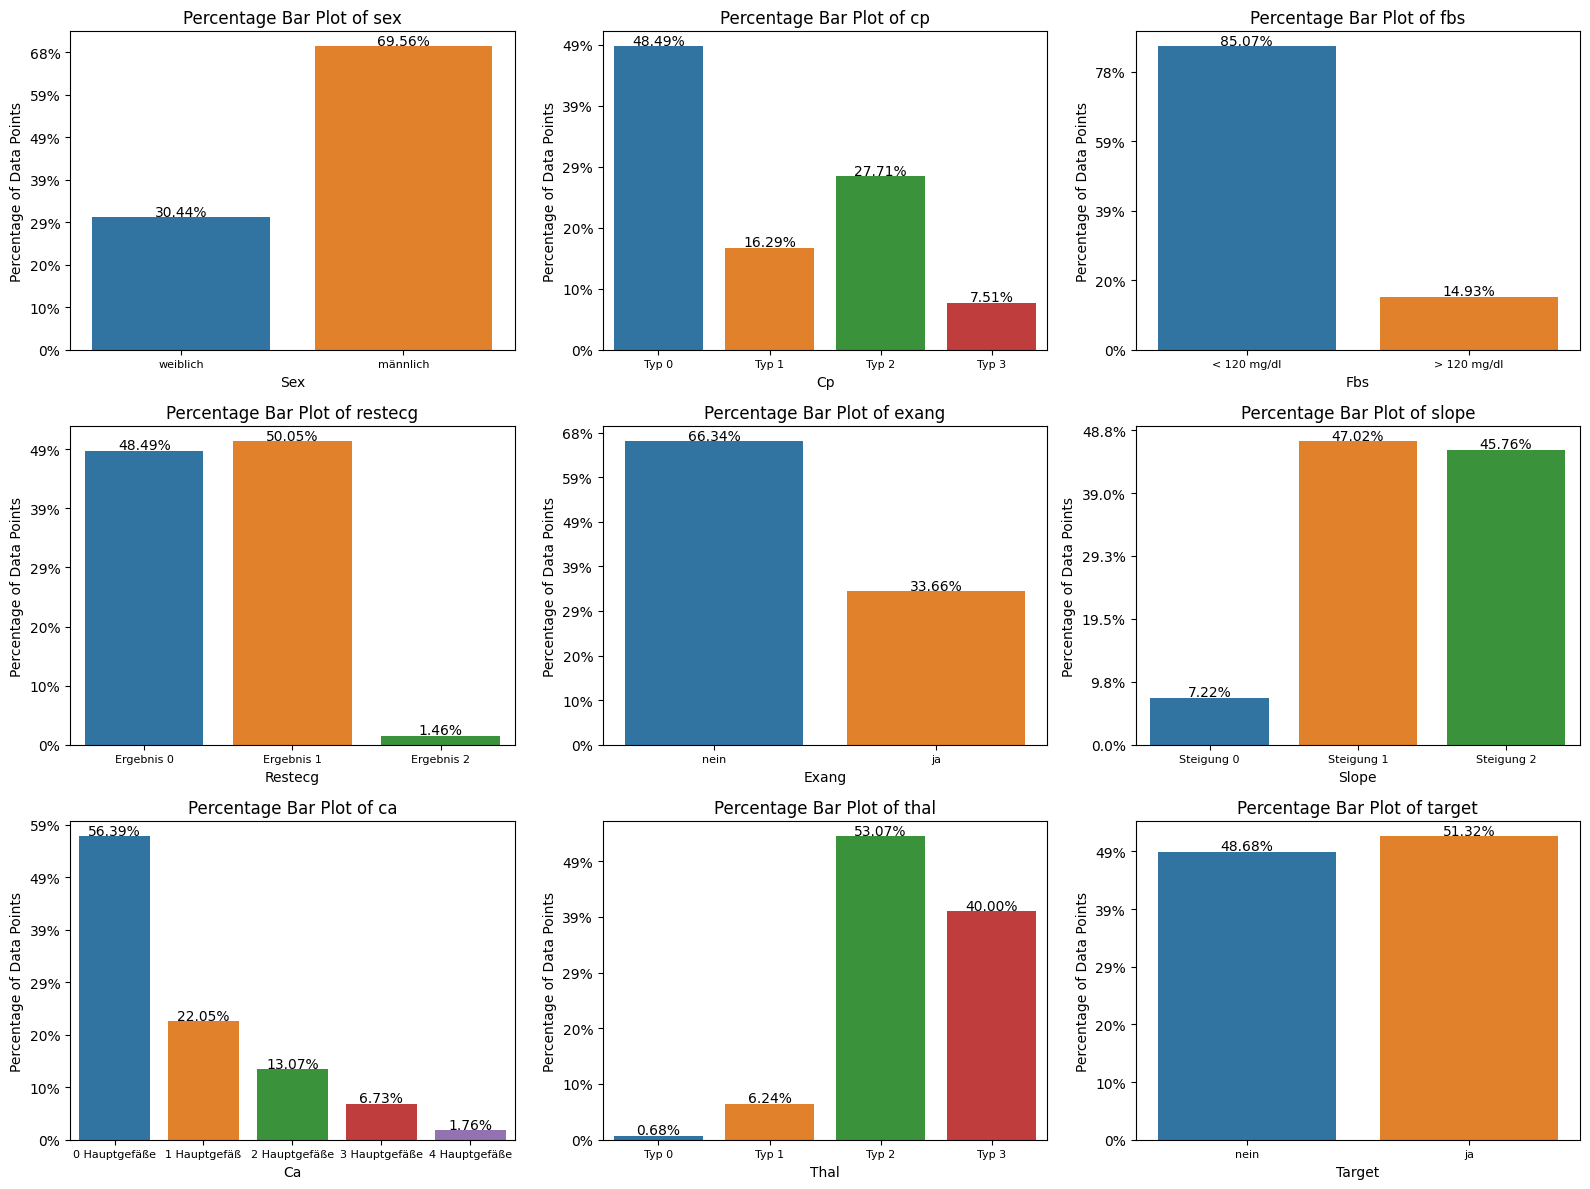

In [8]:
# sex (0,1):	Das Geschlecht des Individuums, wobei "0" für weiblich und "1" für männlich steht.
# cp (0-3): 	Die Art der Brustschmerzen, wobei verschiedene Zahlen verschiedene Schmerztypen repräsentieren.
# fbs (0,1): 	Der Blutzuckerspiegel nach dem Fasten, wobei "0" einen Wert unter 120 mg/dl und "1" einen Wert über 120 mg/dl anzeigt.
# restecg (0-2): 	Ergebnisse des Elektrokardiogramms im Ruhezustand.
# exang (0,1): 	Das Vorhandensein von Angina pectoris während des Trainings, wobei "0" für "nein" und "1" für "ja" steht.
# slope (0-2): 	Die Steigung des Höhepunkts des ST-Segments beim Training.
# ca (0-4): 	Die Anzahl der Hauptgefäße, die durch Fluoroskopie gefärbt wurden.
# thal (0-3): 	Ein Test, der die Blutversorgung des Herzens misst.
# target (0,1): 	Ob eine Herzerkrankung beim Individuum diagnostiziert wurde ("0" für "nein", "1" für "ja").


import matplotlib.ticker as ticker 

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

category_labels = {
    'sex': {0: 'weiblich', 1: 'männlich'},
    'cp': {0: 'Typ 0', 1: 'Typ 1', 2: 'Typ 2', 3: 'Typ 3'},
    'fbs': {0: '< 120 mg/dl', 1: '> 120 mg/dl'},
    'restecg': {0: 'Ergebnis 0', 1: 'Ergebnis 1', 2: 'Ergebnis 2'},
    'exang': {0: 'nein', 1: 'ja'},
    'slope': {0: 'Steigung 0', 1: 'Steigung 1', 2: 'Steigung 2'},
    'ca': {0: '0 Hauptgefäße', 1: '1 Hauptgefäß', 2: '2 Hauptgefäße', 3: '3 Hauptgefäße', 4: '4 Hauptgefäße'},
    'thal': {0: 'Typ 0', 1: 'Typ 1', 2: 'Typ 2', 3: 'Typ 3'},
    'target': {0: 'nein', 1: 'ja'}
}

plt.figure(figsize=(16, 12))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    # Calculate the percentage of each category
    total = float(len(heart_df))
    ax = sns.countplot(x=col, data=heart_df)
    plt.title(f'Percentage Bar Plot of {col}')
    plt.xlabel(col.capitalize()) 
    plt.xticks(fontsize=8)
    plt.ylabel('Percentage of Data Points')  # Add y-axis label
    
    ax.set_xticklabels(category_labels[col].values())
    ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=total))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 3,
                '{:1.2f}%'.format((height / total) * 100),
                ha="center")

plt.tight_layout()
plt.show()

### Histogramme

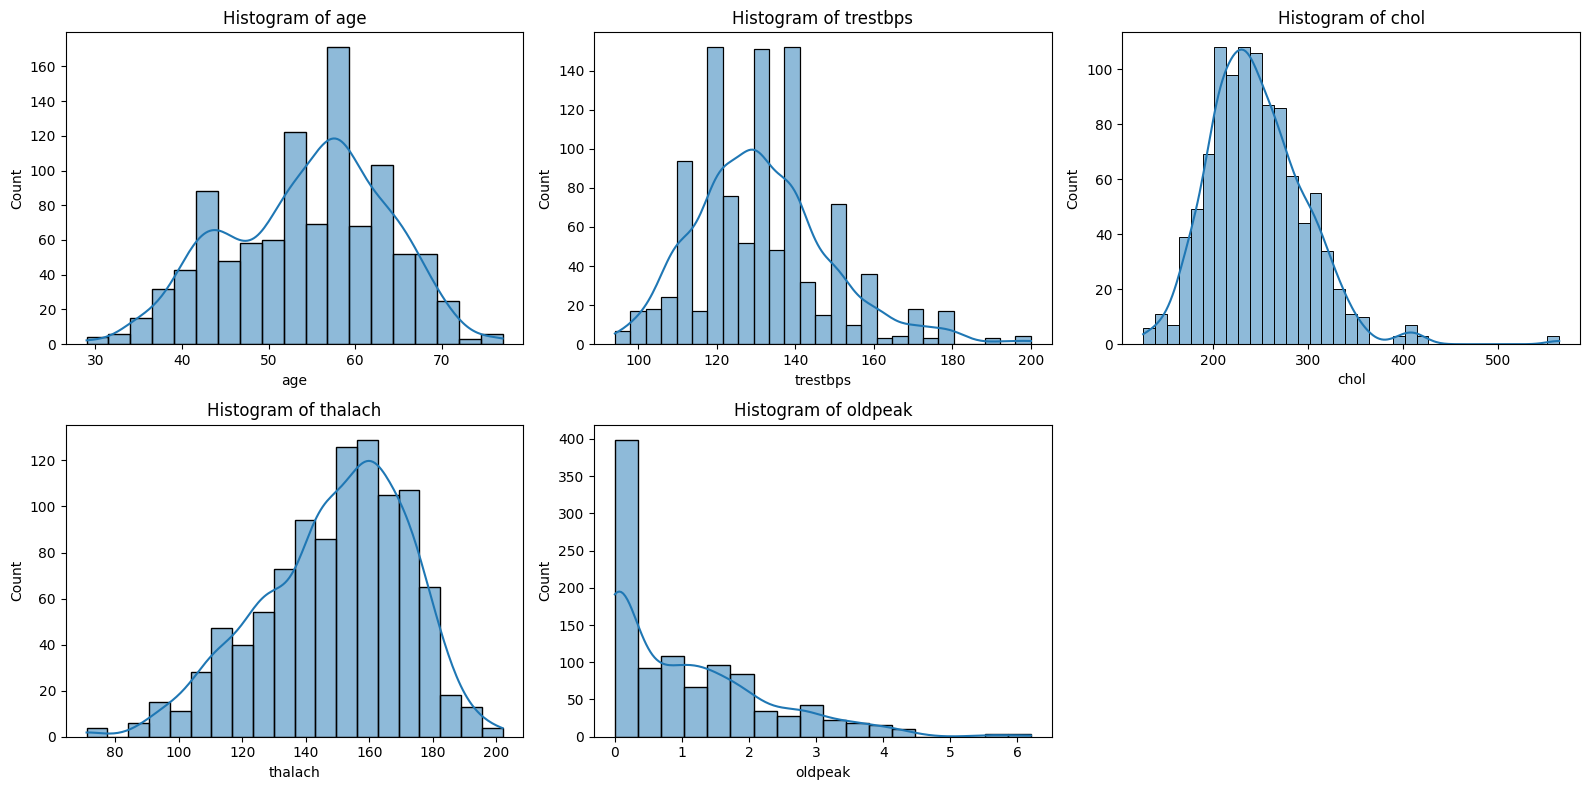

In [9]:
# Define continuous columns for which histograms will be plotted with counts
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(16, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    #kde beschreibt die Dichte der Verteilung
    sns.histplot(heart_df[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()


#### Interpretation der Histogramme
1. **age:** Die Altersverteilung zeigt, dass die meisten Menschen im Alter zwischen 50 und 60 Jahren sind.
2. **trestbps:** Der Ruheblutdruck zeigt eine annähernd normale Verteilung mit einem Peak um 130 mm Hg.
3. **chol:** Der Cholesterinspiegel zeigt eine rechtsschiefe Verteilung mit einem Peak um 240 mg/dl.
4. **thalach:** Die maximale Herzfrequenz zeigt eine linksschiefe Verteilung mit einem Peak um 160.
5. **oldpeak:** Die ST-Depression zeigt eine rechtsschiefe Verteilung, wobei die meisten Werte nahe 0 liegen.

#### Interpretation der Balkendiagramme
1. **sex:** Es gibt mehr Männer als Frauen in diesem Datensatz.
2. **cp:** Die meisten Menschen haben den Brustschmerztyp 0.
3. **fbs:** Die meisten Menschen haben einen nüchternen Blutzucker weniger als 120 mg/dl.
4. **restecg:** Die Werte sind hauptsächlich auf 0 und 1 konzentriert.
5. **exang:** Die Mehrheit der Menschen erlebt keine durch Bewegung induzierte Angina pectoris.
6. **slope:** Die Steigung des Peaks des Übungs-ST-Segments ist hauptsächlich 1 oder 2.
7. **ca:** Die meisten Menschen haben keine großen Gefäße, die durch Fluoroskopie gefärbt wurden.
8. **thal:** Der Wert von thal ist hauptsächlich 2.
9. **target:** Der Datensatz ist ziemlich ausgewogen zwischen Menschen mit Herzkrankheit und solchen ohne.

### Boxplots
Hier sind die Boxplots für die numerischen Variablen, getrennt nach der Zielvariable target:

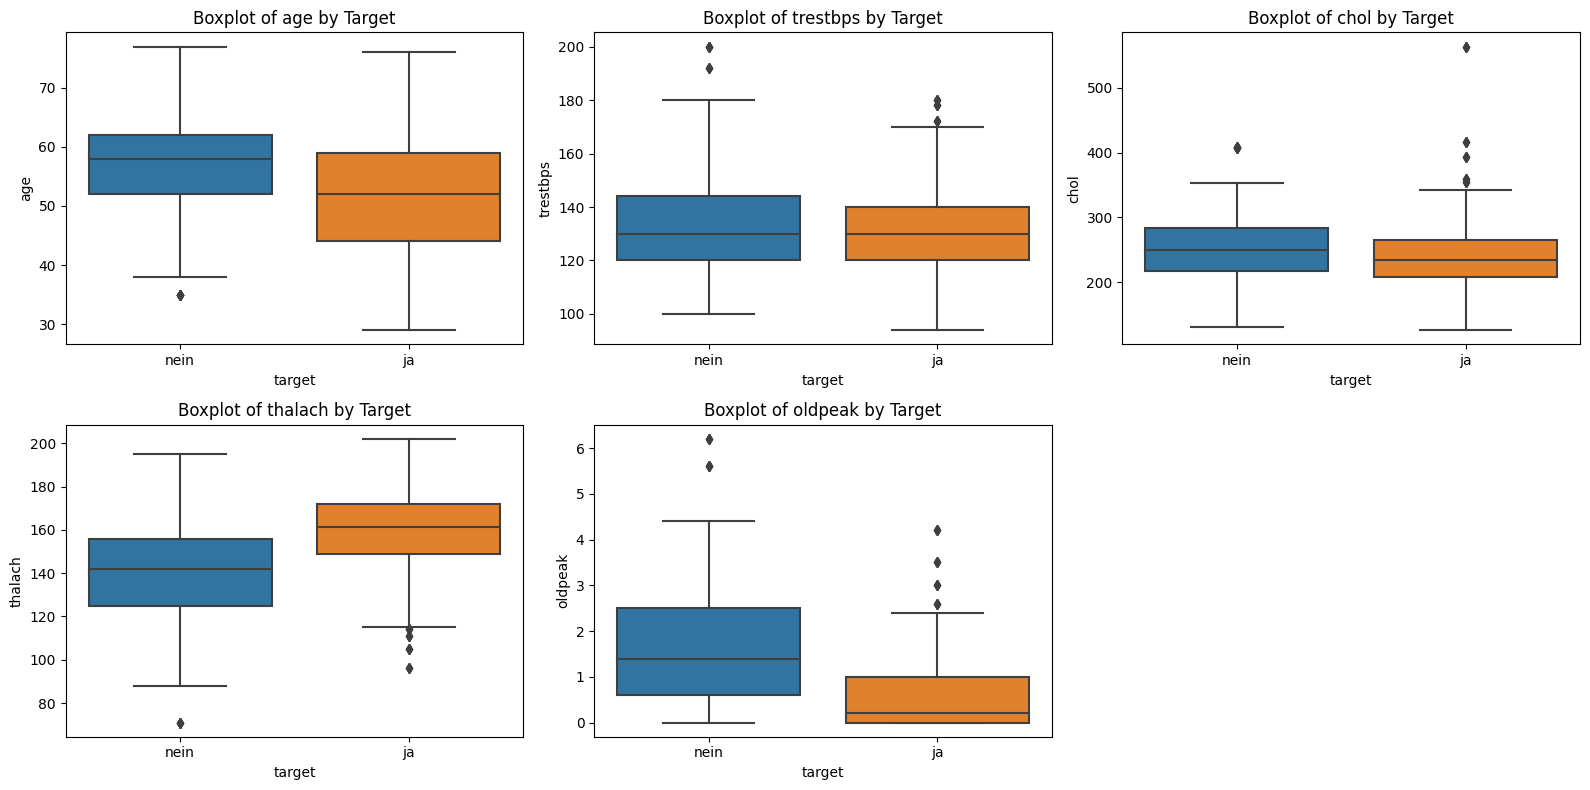

In [10]:
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
target_labels = {0: 'nein', 1: 'ja'}

plt.figure(figsize=(16, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='target', y=col, data=heart_df)
    plt.xticks([0, 1], ['nein', 'ja'])
    plt.title(f'Boxplot of {col} by Target')
plt.tight_layout()
plt.show()

1. **age:** Es gibt einige Unterschiede im Alter zwischen den Menschen mit und ohne Herzkrankheit. Menschen mit Herzkrankheit tendieren dazu, älter zu sein.
2. **trestbps:** Der Ruheblutdruck zeigt einige Ausreißer, aber der Median scheint zwischen Menschen mit und ohne Herzkrankheit ähnlich zu sein.
3. **chol:** Der Cholesterinspiegel zeigt viele Ausreißer in beiden Kategorien, und der Median scheint auch ähnlich zu sein.
4. **thalach:** Die maximale Herzfrequenz zeigt deutliche Unterschiede zwischen Menschen mit und ohne Herzkrankheit. Menschen mit Herzkrankheit tendieren dazu, eine höhere maximale Herzfrequenz zu haben.
5. **oldpeak:** ST-Depression zeigt auch Unterschiede zwischen den beiden Kategorien, wobei Menschen mit Herzkrankheit tendenziell niedrigere Werte haben.

### Q-Q Plots
Q-Q Plots sind nützlich, um zu visualisieren, wie gut eine Variable einer Normalverteilung folgt. Abweichungen von der Diagonalen können auf eine Nicht-Normalverteilung hinweisen. Diese Informationen können nützlich sein, wenn man überlegt, welche Art von statistischen Tests oder Modellanpassungen durchgeführt werden sollen, da einige Methoden die Annahme der Normalverteilung der Daten erfordern.

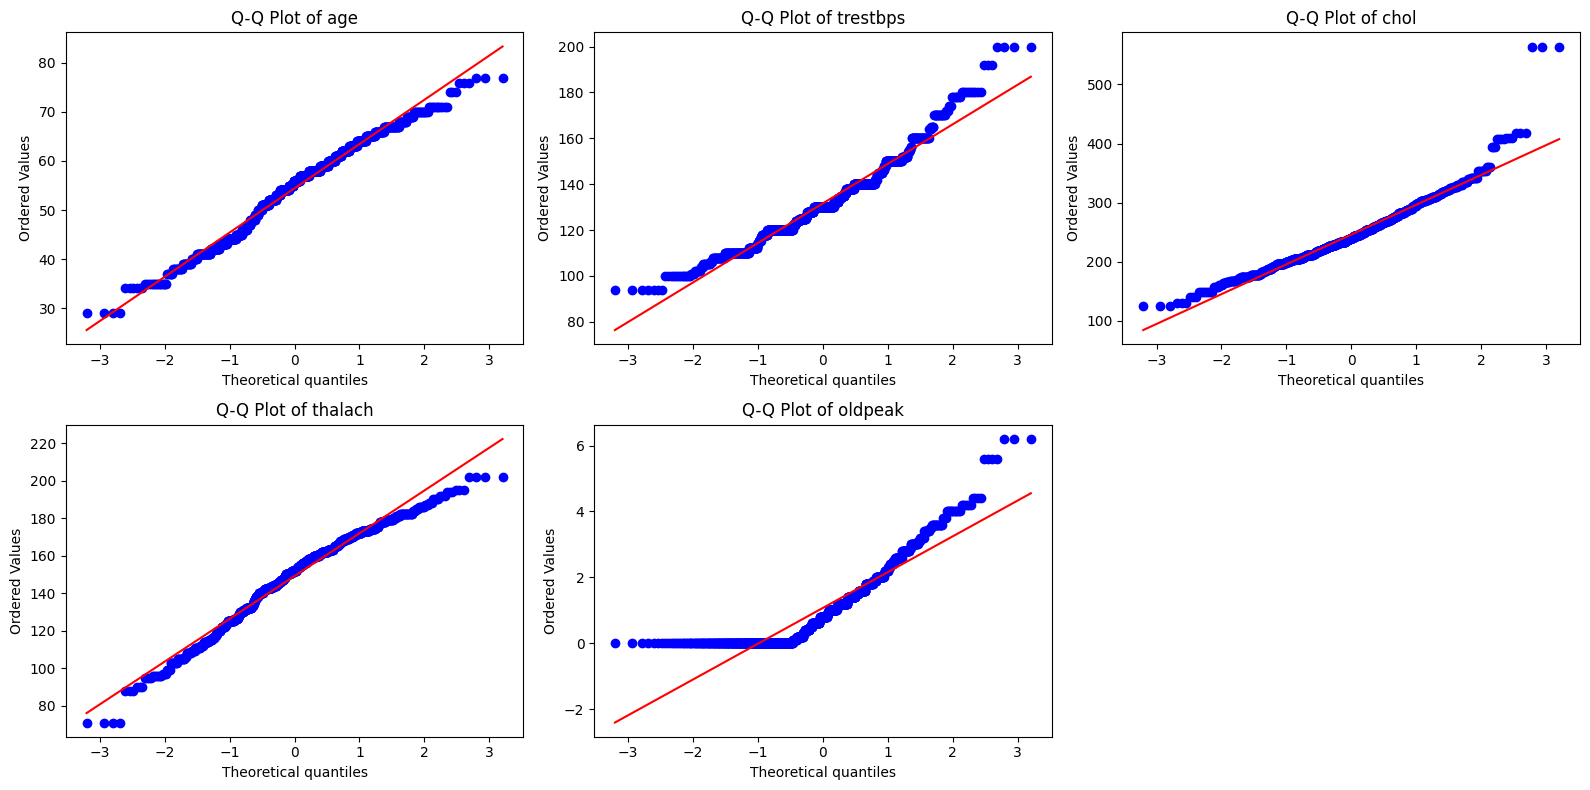

In [11]:
# Set up the matplotlib figure for Q-Q plots of numerical columns
plt.figure(figsize=(16, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    stats.probplot(heart_df[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col}')
plt.tight_layout()
plt.show()

1. **age:** Der Plot zeigt eine leichte Abweichung von der Normalverteilung, insbesondere am unteren Ende.
2. **trestbps:** Der Plot zeigt, dass diese Variable nicht normalverteilt ist, mit Abweichungen an beiden Enden.
3. **chol:** Diese Variable zeigt eine signifikante Abweichung von der Normalverteilung, insbesondere am oberen Ende.
4. **thalach:** Der Plot zeigt eine leichte Abweichung von der Normalverteilung am oberen Ende.
5. **oldpeak:** Diese Variable ist deutlich nicht normalverteilt, mit einer erheblichen Abweichung am oberen Ende.

### Korrelationsmatrix und Heatmap
Die Korrelationsmatrix zeigt die Korrelationskoeffizienten zwischen den verschiedenen Variablen. Ein Korrelationskoeffizient nahe +1 oder -1 bedeutet eine starke positive bzw. negative Korrelation, während ein Wert nahe 0 eine schwache oder keine Korrelation anzeigt.

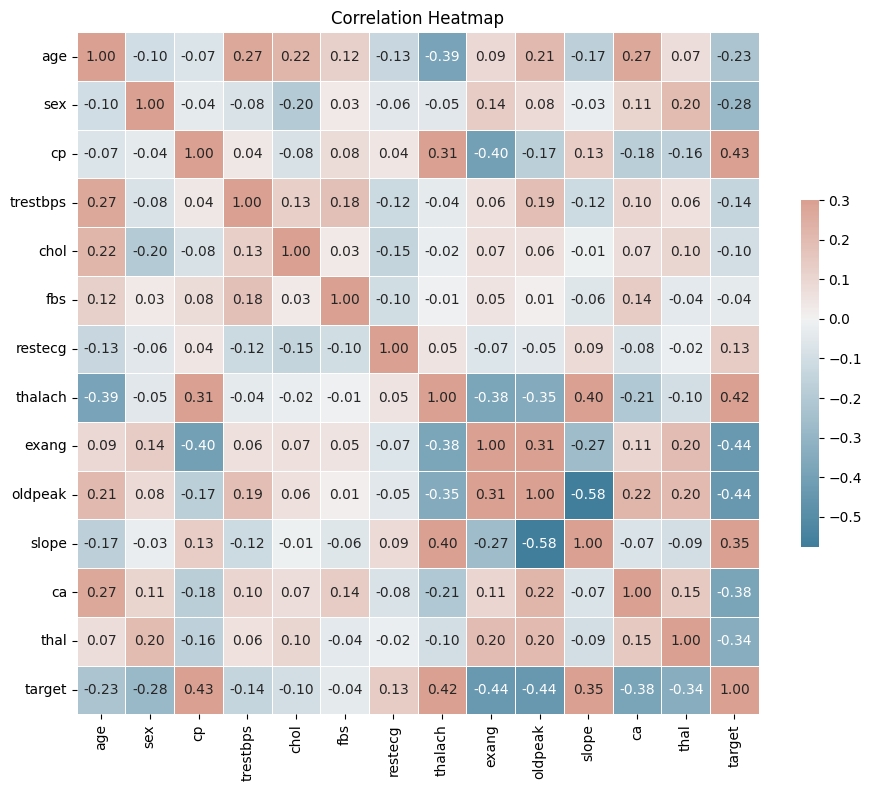

In [12]:
# Compute the correlation matrix
corr = heart_df.corr()
fig, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


1. **cp** hat eine moderate positive Korrelation mit der Zielvariablen target. Dies deutet darauf hin, dass verschiedene Brustschmerztypen mit der Präsenz von Herzkrankheiten zusammenhängen können.
2. **exang** hat eine moderate negative Korrelation mit der Zielvariablen target. Dies könnte darauf hinweisen, dass Menschen ohne durch Bewegung induzierte Angina pectoris wahrscheinlicher Herzkrankheiten haben.
3. **thalach** und slope haben ebenfalls eine moderate positive Korrelation mit der Zielvariablen target.

### Paarplots
Ich werde nun Paarplots für ausgewählte Variablen erstellen, um die Beziehungen zwischen diesen Variablen weiter zu untersuchen. Paarplots sind besonders nützlich, um Trends, Muster und Beziehungen zwischen Paaren von Variablen zu visualisieren.

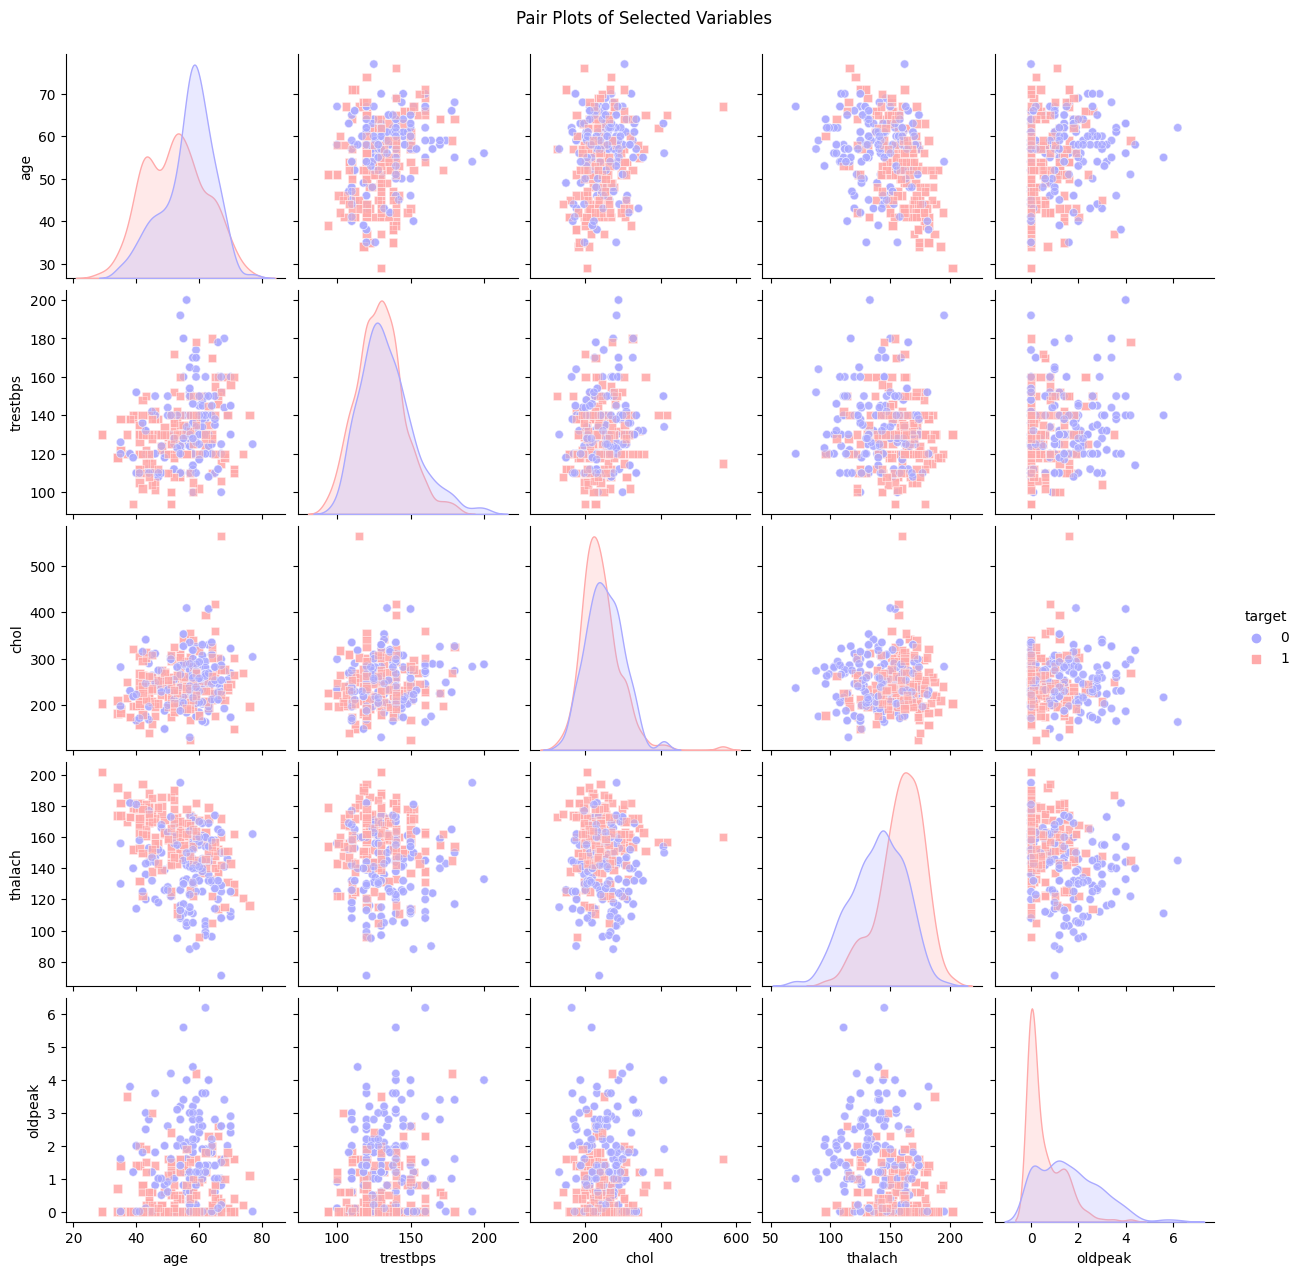

In [13]:
# Selecting a subset of variables for pair plots
selected_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']
pairplot_data = heart_df[selected_columns]

pair_plot = sns.pairplot(pairplot_data, hue='target', markers=["o", "s"], palette='bwr', plot_kws={'alpha':0.5})

plt.suptitle('Pair Plots of Selected Variables', y=1.02)
plt.show()


#medianomputer